<a href="https://colab.research.google.com/github/RG-111/Transport_Demand_Prediction/blob/main/Transport_Demand_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transport Demand Prediction**



In summary, the project aims to create a model that predicts the number of seats sold for each ride on specific routes, dates, and times for Mobiticket. The routes originate from 14 towns towards Lake Victoria, ending in Nairobi. The journey takes around 8 to 9 hours to reach the outskirts of Nairobi and an additional 2 to 3 hours to reach the main bus terminal. Passengers are influenced by traffic conditions during their travel into the city and onward to their final destinations in Nairobi. Understanding these patterns can help improve service planning and optimize operations for Mobiticket.

To enhance the performance of the model, additional features have been generated. These new features aim to provide more relevant information and contribute to improved predictions. The dataset has been subjected to testing using multiple regression models. These models have been employed to analyze the data and derive insights, allowing for a comprehensive evaluation of the predictive capabilities. The most significant features identified by the model are highlighted and displayed. These key features play a crucial role in determining the number of seats sold for each ride. By showcasing these important factors, stakeholders can gain a better understanding of the influential elements driving seat sales.

# **Problem Statement**


## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark


### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## ***Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [8]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/Transport Deemand Prediction/train_revised.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 51645 rows and 10 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    51645
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

### What did you know about your dataset?

In the above data:
1. There are no duplicate rows
2. There are no null values

## ***Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


### Variables Description

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.describe(include='object').iloc[1,:]

seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
Name: unique, dtype: object

## ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49


There is no specified target variable in the data.

According to business problem, it requires us to predict the number of tickets we can sell on a particular route and particular date and time. Hence, a new column is created for number of tickets by grouping the data on ride_id

In [ ]:
#Checking number of unique ride ids
len(df['ride_id'].unique())

6249

In [ ]:
#Making target variable 'number of ticket' by grouping the dataframe on ride_id column
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temp_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
#Dropping constant column travel_to and other unuseful columns
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(51645, 6)

In [ ]:
#Dropping duplicates
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 6)

In [ ]:
# Merging this new dataframe with orginal dataframe on column ride_id
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [ ]:
#Creating a column date_time which is a combination of columns travel_date and travel_time
df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
df['travel_date'] = pd.to_datetime(df['travel_date'])

In [ ]:
df_copy = df.copy()

In [ ]:
#Creating additonal features with travel_date and travel_time columns

#Creating a function to add the above features
def create_date_cols(df_temp):
  df_temp['travel_month'] = df_temp['travel_date'].dt.month
  df_temp['travel_year'] = df_temp['travel_date'].dt.year
  df_temp['travel_day_of_month'] = df_temp['travel_date'].dt.day
  df_temp['travel_day_of_year'] = df_temp['travel_date'].dt.dayofyear
  df_temp['travel_day_of_week'] = df_temp['travel_date'].dt.dayofweek
  df_temp['travel_hour'] = pd.to_datetime(df_temp['travel_time']).dt.hour
  df_temp['quarter'] = df_temp['travel_date'].dt.quarter
  df_temp['is_weekend'] = df_temp['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

  return df_temp

#Applying function on our dataframe
df_copy = create_date_cols(df_copy)

In [ ]:
df_copy.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend'],
      dtype='object')

In [ ]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0


In [ ]:
#Converting travel_time column into integer format
df_copy['travel_time'] = df_copy['travel_time'].str.split(':').apply(lambda x: round(int(x[0]) + int(x[1])/60 ,2) )

In [ ]:
#Creating function that defines periods for time intervals
def get_period(hour):
  if hour<7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

df_copy['time_period_of_day'] = df_copy['travel_hour'].apply(get_period)

In [ ]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1,mor
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1,mor
3,5777,2017-11-27,7.17,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0,mor
4,5778,2017-11-27,7.20,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0,mor


### What all manipulations have you done and insights you found?

1. Created target variable 'number_of_ticket'
2. Dropped constant and non essential columns
3. Used travel_date and travel_time columns to extract and create datetime related features
4. Created period feature from travel time for data visualization

## ***Data Vizualization***

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Chart - 1

Text(0.5, 1.0, 'Distribution of tickets')

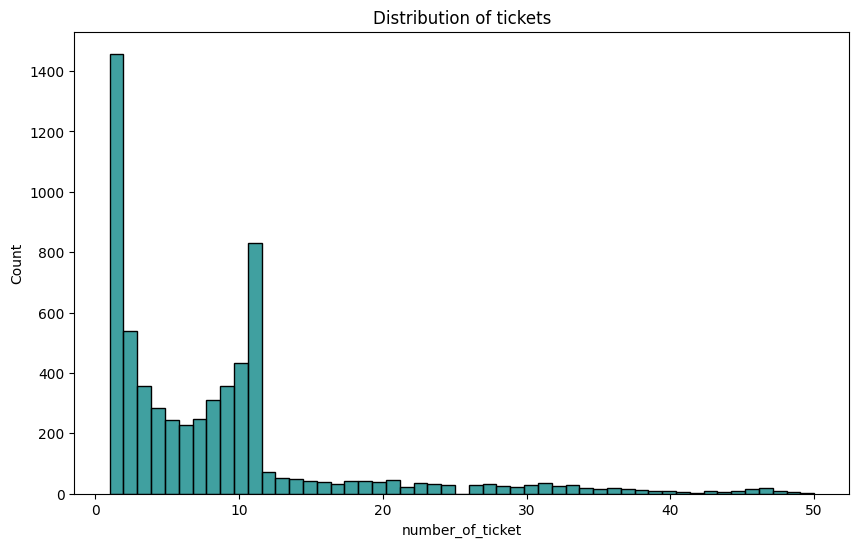

In [ ]:
# Chart - 1 visualization code
#Histogram for distribution of tickets
plt.figure(figsize=(10,6))
sns.histplot(df_copy['number_of_ticket'], color='teal')
plt.title("Distribution of tickets")

##### What is/are the insight(s) found from the chart?

From data, usually number of tickets bought per ride_id is between 1 and 12

#### Chart - 2

Text(0, 0.5, 'Count')

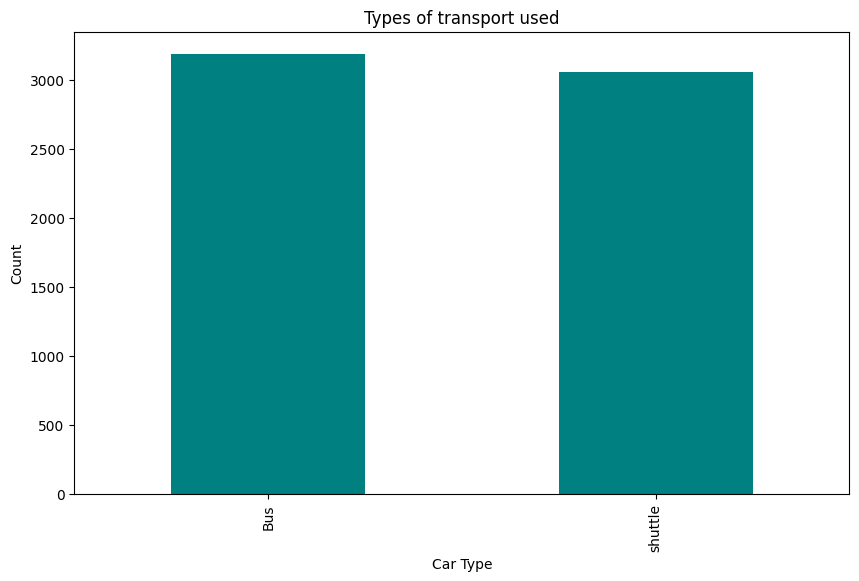

In [ ]:
# Chart - 2 visualization code
#Bar chart for types of transport used
plt.figure(figsize=(10,6))
df_copy['car_type'].value_counts().plot(kind='bar',color='teal')
plt.title("Types of transport used")
plt.xlabel('Car Type')
plt.ylabel('Count')

##### What is/are the insight(s) found from the chart?

The number of Buses and shuttle are nearly equal in the data. Hence, both type of cars are used equally for traveling.

#### Chart - 3

Text(0, 0.5, 'Count')

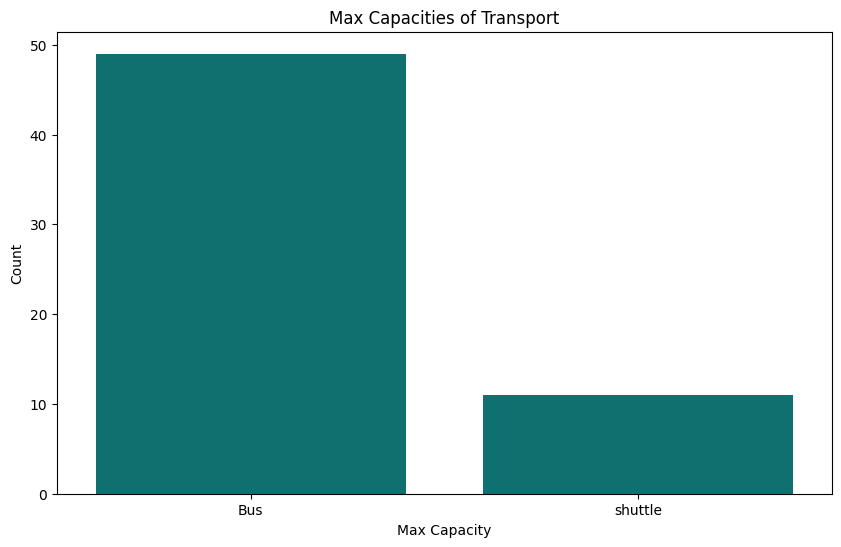

In [ ]:
# Chart - 3 visualization code

#Bar chart for Max Capacities of transport
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x='car_type', y='max_capacity', color='teal')
plt.title("Max Capacities of Transport")
plt.xlabel('Max Capacity')
plt.ylabel('Count')

###### What is/are the insight(s) found from the chart?

Buses have max capacity of bus is 49, whereas max capacity of shuttle is 11.

#### Chart - 4

Text(0, 0.5, 'Number of Tickets')

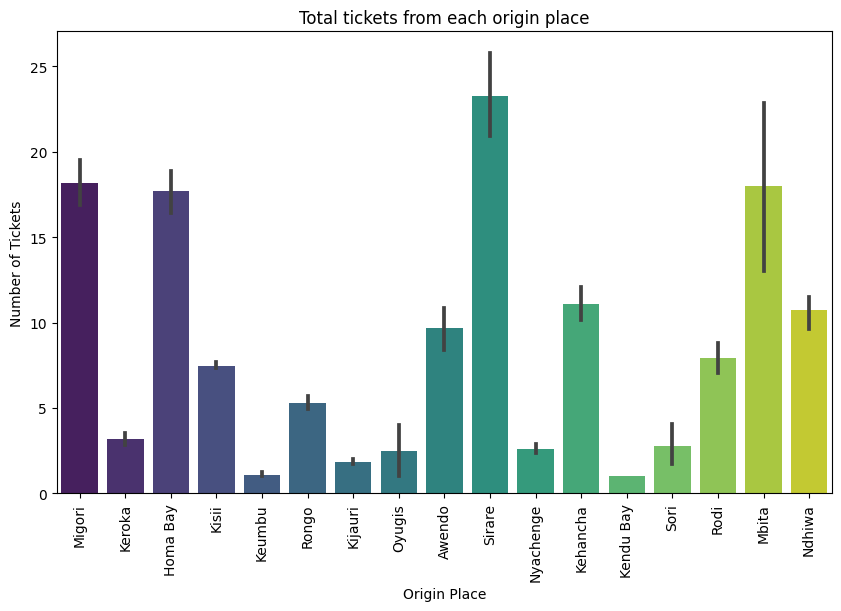

In [ ]:
# Chart - 4 visualization code

#Bar chart for total number of ticket from each origin place
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy,x='travel_from',y='number_of_ticket', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')
plt.xlabel('Origin Place')
plt.ylabel('Number of Tickets')

#####  What is/are the insight(s) found from the chart?

Most number of tickets are sold from:
1. Sirare
2. Mbita
3. Migori

While the least number of tickets are sold from:
1. Keumbu
2. Kendu Bay

#### Chart - 5

Text(0, 0.5, 'Count')

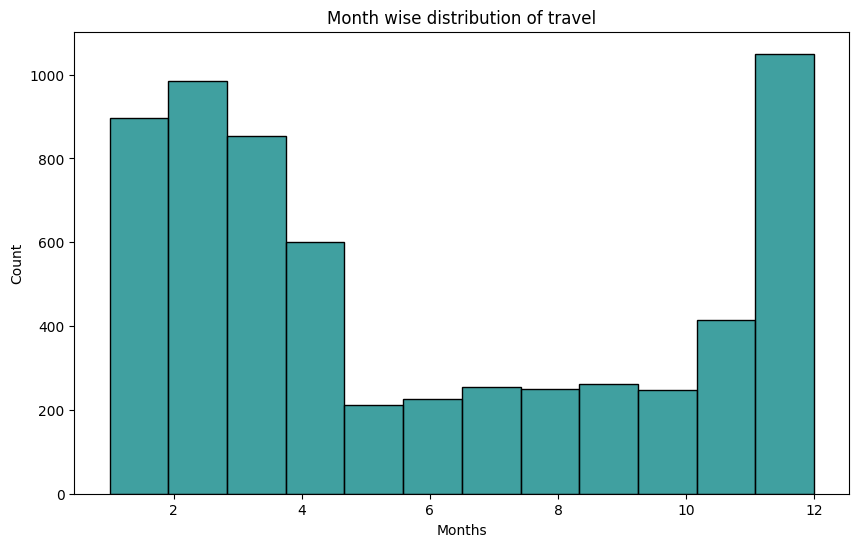

In [ ]:
# Chart - 5 visualization code

#Monthwise Distribution of travellers

plt.figure(figsize=(10,6))
sns.histplot(df_copy['travel_month'],bins=12, color='teal')
plt.title('Month wise distribution of travel')
plt.xlabel('Months')
plt.ylabel('Count')

##### What is/are the insight(s) found from the chart?

Most of the traveling is done in the months of January, February and December.

#### Chart - 6

Text(0, 0.5, 'Count')

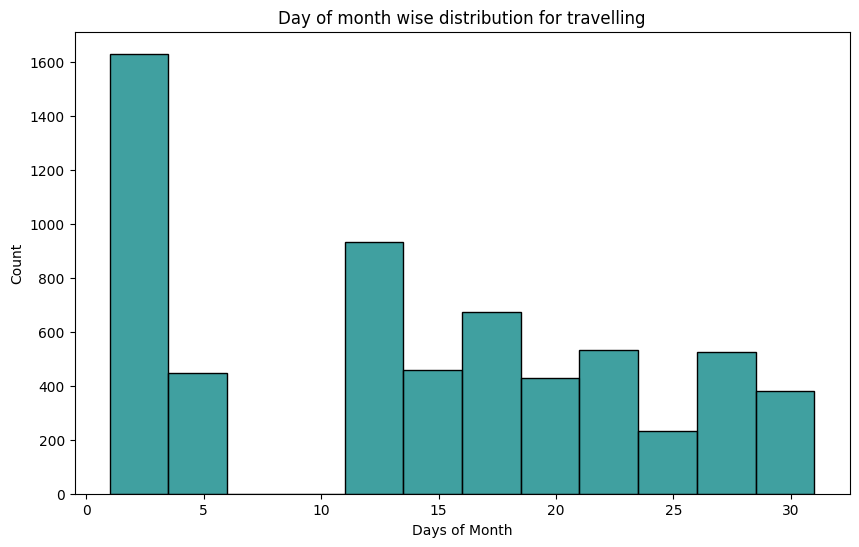

In [ ]:
# Chart - 6 visualization code
#Day of Monthwise Distribution of travellers
plt.figure(figsize=(10,6))
sns.histplot(df_copy['travel_day_of_month'],bins=12, color='teal')
plt.title('Day of month wise distribution for travelling')
plt.xlabel('Days of Month')
plt.ylabel('Count')

##### What is/are the insight(s) found from the chart?

Most of the traveling is done from before 5th of the month, there seems to be no traveling done between 5th and 11th of the month. This can be because of transport holiday during this period every month.

#### Chart - 7

Text(0.5, 1.0, 'Number of tickets for every day of month')

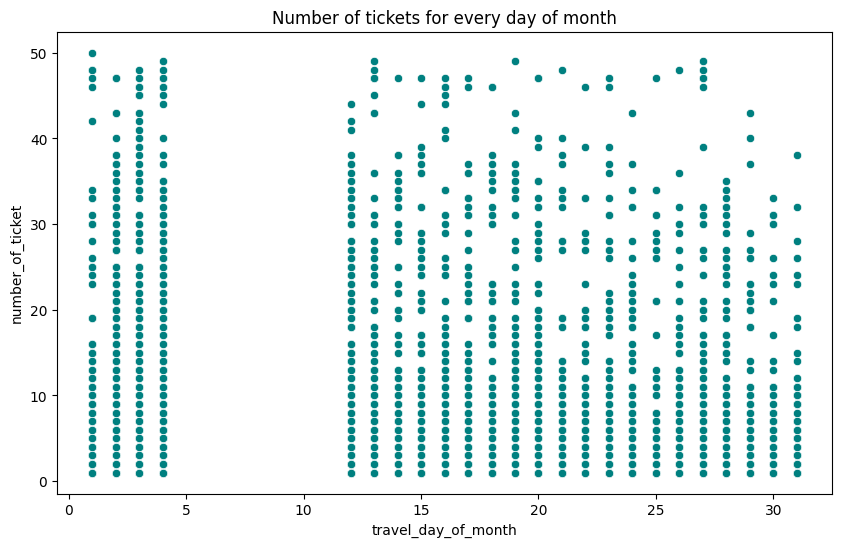

In [ ]:
# Chart - 7 visualization code

#Scatterplot of number of tickets sold for everyday of the month
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy, x='travel_day_of_month',y='number_of_ticket',color='teal')
plt.title('Number of tickets for every day of month')

##### What is/are the insight(s) found from the chart?

Similar to above graph, we can see there are no tickets sold between 5th and 11th of every month. Transport may be closed during this period every month because of tranport holiday.

#### Chart - 8

Text(0.5, 1.0, 'Number of tickets for each hour of day')

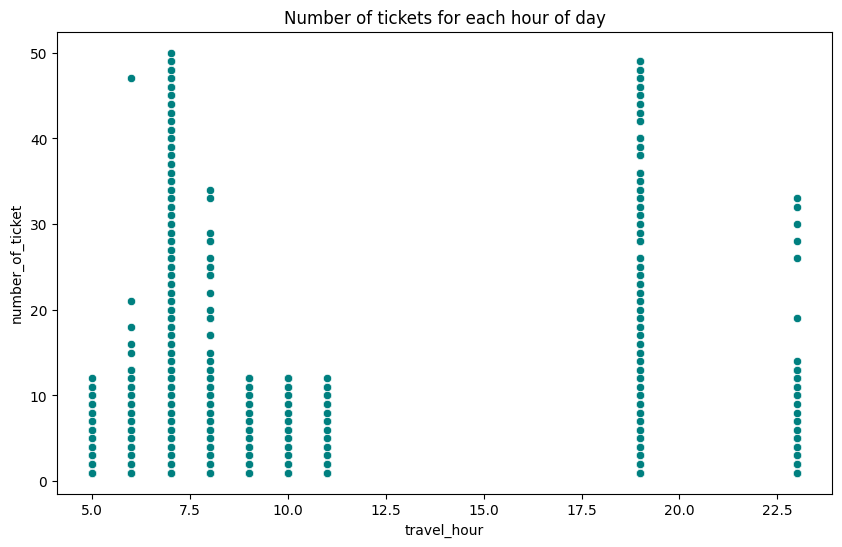

In [ ]:
# Chart - 8 visualization code

#Scatterplot for number of tickets in every hour of day.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_ticket',color='teal')
plt.title('Number of tickets for each hour of day')

##### What is/are the insight(s) found from the chart?

In the day, most tickets are sold at 7AM and close to 7PM. This can be because people going to and returning from work in Nairobi at these times. Similarly, there are no tickets sold between 12PM and 5:30 PM.

#### Chart - 9

Text(0.5, 1.0, 'Number of tickets for each period of day')

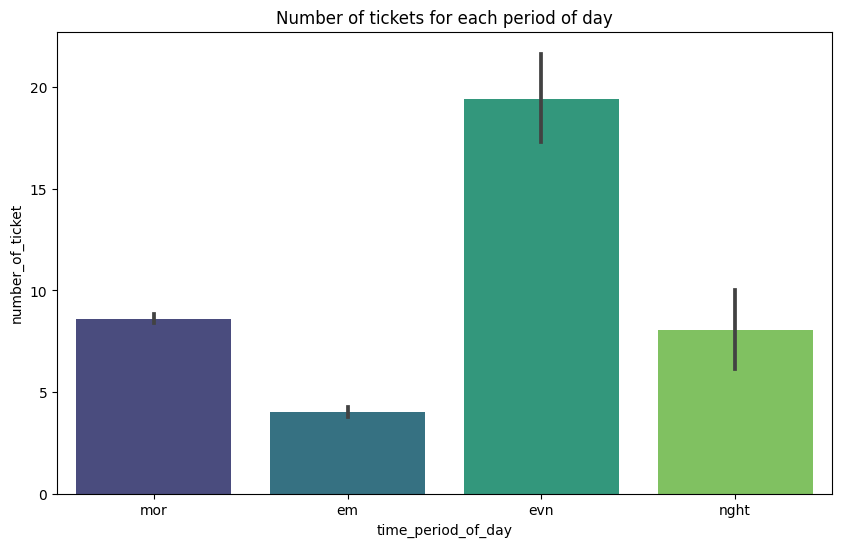

In [ ]:
# Chart - 9 visualization code

#Bar chart for Number of tickets for each period of day
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_ticket', palette='viridis')
plt.title('Number of tickets for each period of day')

##### What is/are the insight(s) found from the chart?

Most number of tickets are sold in evening followed by morning hours.

## ***Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Most number of tickets are sold in morning.
2. The number of buses used in traveling is same as the number of shuttle used
3. There is no traveling done in afternoon.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Most number of tickets are sold in morning.

Null Hypothesis : Most number of tickets are sold in morning

Alternative Hypothesis : Most number of tickets are not sold in morning

#### 2. Perform an appropriate statistical test.

Text(0.5, 1.0, 'Number of tickets for each period of day')

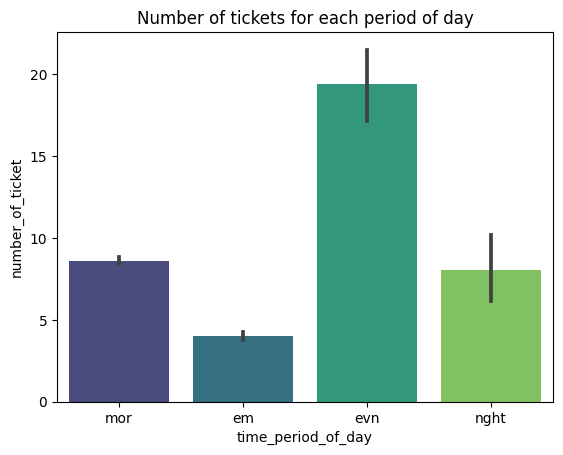

In [ ]:
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_ticket', palette='viridis')
plt.title('Number of tickets for each period of day')

From above we can see, max tickets are sold in evening, hence we can reject null hypothesis

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: The number of buses used in traveling is same as the number of shuttle used. Let Number of buses used be Nb, and Number of shuttle used be Ns

Null Hypothesis (H0) : Nb = Ns

Arlternative Hypothesis (Ha) : Nb != Ns

#### 2. Perform an appropriate statistical test.

Text(0, 0.5, 'Count')

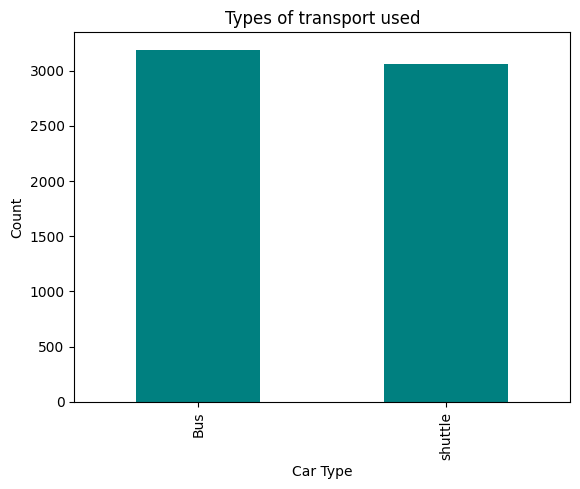

In [ ]:
df_copy['car_type'].value_counts().plot(kind='bar',color='teal')
plt.title("Types of transport used")
plt.xlabel('Car Type')
plt.ylabel('Count')

From above, Nb > Ns, hence we can reject Null Hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is no traveling done in afternoon. Let number of travellers at afternoon period (12pm - 4pm) be Na.

Null Hypothesis (H0) : Na = 0  (No travellers in afternoon)

Alternative Hypothesis (Ha) : Na != 0

#### 2. Perform an appropriate statistical test.

Text(0.5, 1.0, 'Number of tickets for each hour of day')

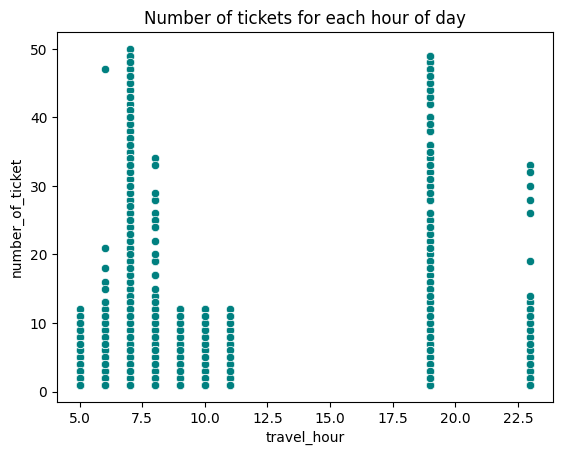

In [ ]:
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_ticket',color='teal')
plt.title('Number of tickets for each hour of day')

From above we can see that between 12pm and 4pm (Afternoon), there are no travellers, or number of tickets sold are 0.

Hence Na = 0, therefore we cannot reject Null Hypothesis.

## ***Feature Engineering, Data Pre-processing & Transformation***

### 1. Feature Manipulation & Selection

In [ ]:
df_copy.travel_month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: travel_month, dtype: int64

In [ ]:
df_copy.travel_day_of_year.value_counts()

285    94
348    89
193    81
224    81
163    80
       ..
359     5
290     1
323     1
330     1
318     1
Name: travel_day_of_year, Length: 149, dtype: int64

In [ ]:
df_copy.travel_day_of_month.value_counts()

2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: travel_day_of_month, dtype: int64

In [ ]:
df_copy.time_period_of_day.value_counts()

mor     4975
em       988
evn      225
nght      61
Name: time_period_of_day, dtype: int64

From above 3 value counts, we can see:
1. Some months have higher frequency of travel
1. Some days in year have very high frequency of travelers, while others have really low frequency. This is because of more traveling being done in some month than others.
2. Some days in a month have high frequeny of travel than others.
3. Some period in the day have high frequency of travel.

To manage this, we will create a dictionary of the frequency for the 4 columns above and create 4 new columns taking log transform for the same.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
period_dict = dict(df_copy.time_period_of_day.value_counts())
df_copy['travel_hour_wise_weights'] = np.log1p(df_copy.time_period_of_day.map(period_dict))

# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(df_copy.travel_day_of_year.value_counts())
df_copy['travel_day_of_year_wise_weights'] = np.log1p(df_copy.travel_day_of_year.map(day_of_year_dict))

# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_copy['travel_day_of_month_wise_weights'] = df_copy.travel_day_of_month.replace(day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_copy['travel_month_wise_weights'] = df_copy.travel_month.replace(travel_month_wise_weights_dict)

In [ ]:
df_copy.head(3)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,...,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,...,290,1,7,4,0,mor,8.512382,0.693147,3,3
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,...,323,6,7,4,1,mor,8.512382,0.693147,3,2
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,...,330,6,7,4,1,mor,8.512382,0.693147,4,2


In [ ]:
# Creating a method to create new features in df

# Creating columns for time difference between next and previous buses for each of the origin places (travel_from).
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date_time.shift(-1)-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]

  #Handling missing values
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


  return data

In [ ]:
transport_data_new = find_difference_bw_bus(df_copy)

In [ ]:
transport_data_new.groupby(["travel_from"]).date_time.shift(-1)

502    2018-01-04 07:08:00
5530   2018-01-04 07:12:00
5533   2018-01-04 07:13:00
5539   2018-01-04 08:00:00
5528   2018-01-13 07:08:00
               ...        
5833   2018-11-04 07:05:00
5875   2018-11-04 23:10:00
5834   2018-12-04 07:05:00
5921   2018-12-04 23:10:00
5884                   NaT
Name: date_time, Length: 6249, dtype: datetime64[ns]

In [ ]:
transport_data_new[['travel_from','date_time','Time_gap_btw_0_1_next_bus','Time_gap_btw_0_1_previous_bus']].head()

,travel_from,date_time,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus
502,Awendo,2017-05-12 07:08:00,-5688.000000,5688.000000
5530,Awendo,2018-01-04 07:08:00,-0.066667,5688.000000
5533,Awendo,2018-01-04 07:12:00,-0.016667,0.066667
5539,Awendo,2018-01-04 07:13:00,-0.783333,0.016667
5528,Awendo,2018-01-04 08:00:00,-215.133333,0.783333


In [ ]:
# Making a dictionary containing distances of originating places from nairobi, taken from google maps
distance_from_nairobi = {'Awendo':351, 'Homa Bay':360, 'Kehancha': 387.7, 'Keroka': 280, 'Keumbu':295, 'Kijauri':271,
                         'Kisii':305.1, 'Mbita':401, 'Migori': 370, 'Ndhiwa': 371, 'Nyachenge':326, 'Rodi':348, 'Rongo':332,
                         'Sirare':392, 'Sori':399}

transport_data_new['distance_to_destination'] = transport_data_new['travel_from'].map(distance_from_nairobi)

In [ ]:
transport_data_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend',
       'time_period_of_day', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'distance_to_destination'],
      dtype='object')

### 2. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
transport_data_new.isnull().sum()

ride_id                             0
travel_date                         0
travel_time                         0
travel_from                         0
car_type                            0
max_capacity                        0
number_of_ticket                    0
date_time                           0
travel_month                        0
travel_year                         0
travel_day_of_month                 0
travel_day_of_year                  0
travel_day_of_week                  0
travel_hour                         0
quarter                             0
is_weekend                          0
time_period_of_day                  0
travel_hour_wise_weights            0
travel_day_of_year_wise_weights     0
travel_day_of_month_wise_weights    0
travel_month_wise_weights           0
Time_gap_btw_0_1_next_bus           1
Time_gap_btw_0_1_previous_bus       1
Time_gap_btw_0_2_next_bus           3
Time_gap_btw_0_2_previous_bus       3
Time_gap_btw_0_3_next_bus           3
Time_gap_btw

In [ ]:
transport_data_new.dropna(inplace=True)

## ***Multicollinearity***

<Axes: >

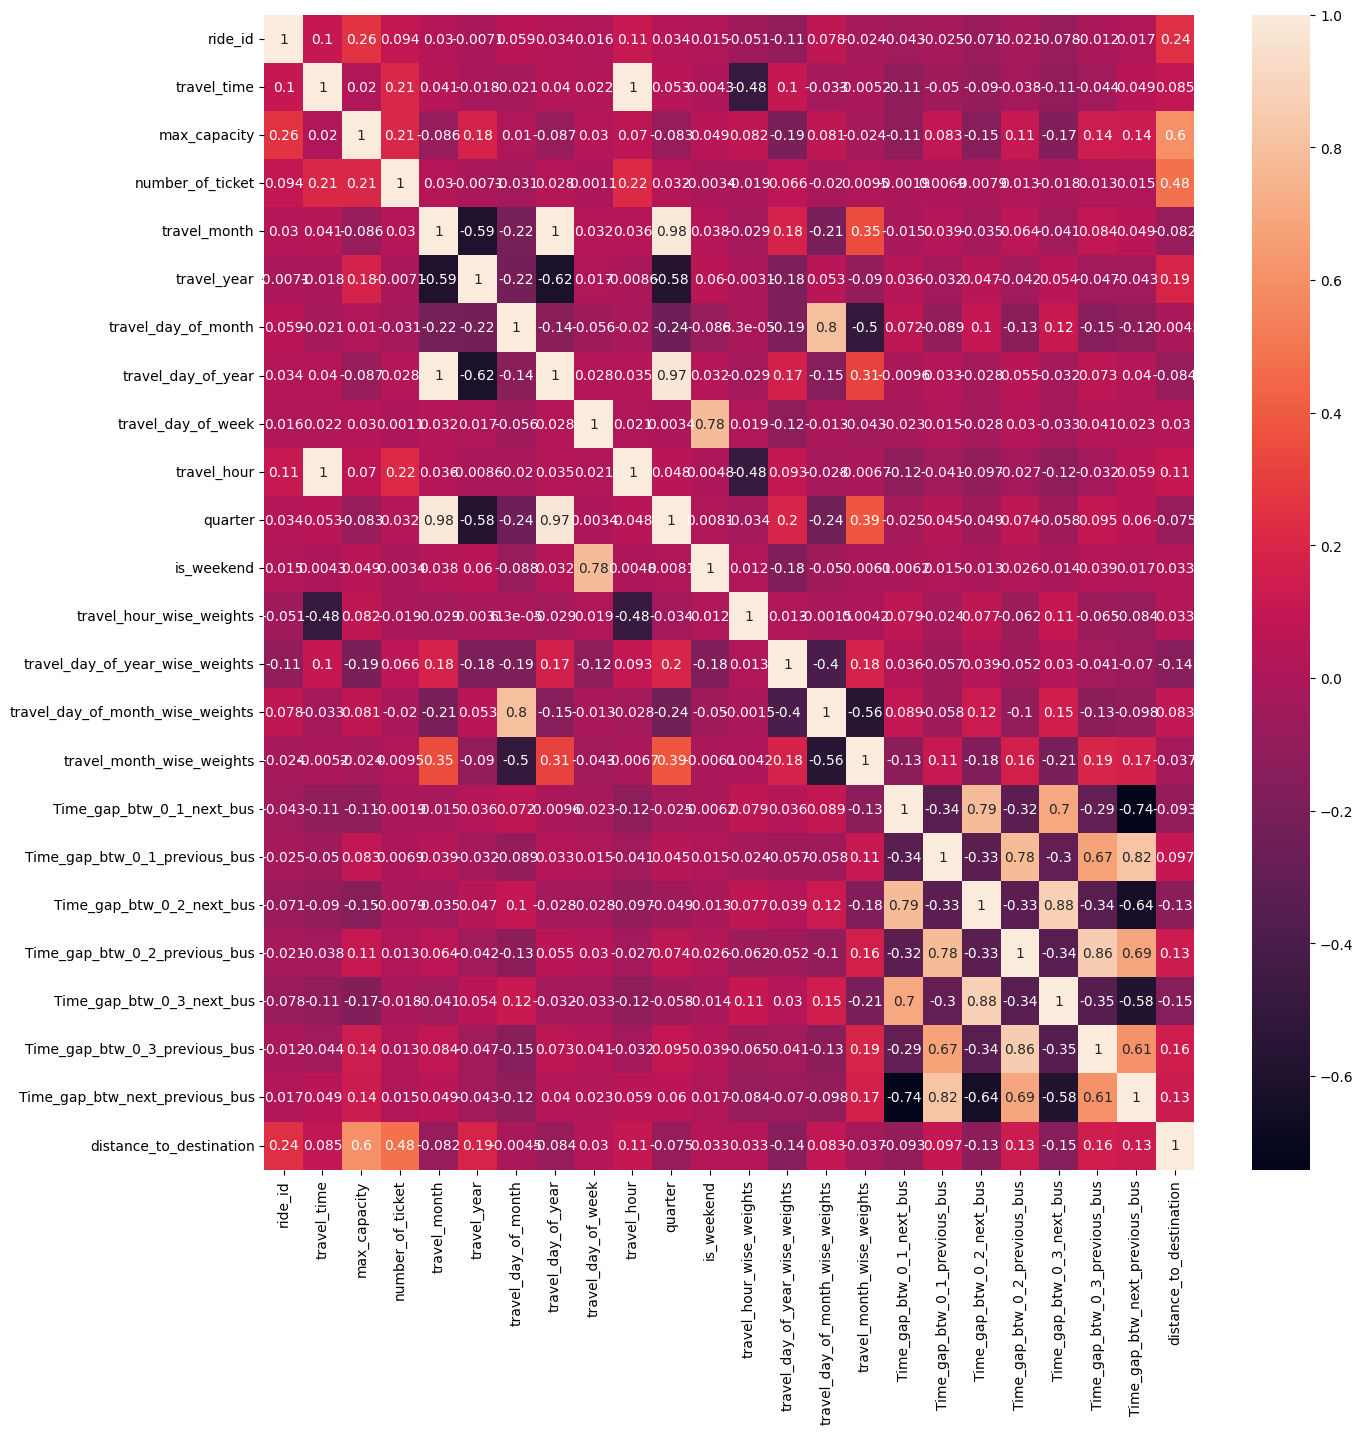

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(transport_data_new.corr(),annot=True)

Many columns have high correlation with newly formed features. Hence columns like travel_month, travel_day_of_year, travel_day_of_month, etc. will be dropped because we have already created new weighted columns for these.

## ***Categorical Encoding + Data Splitting***

In [ ]:
# Encode your categorical columns
from sklearn import preprocessing
final_df = pd.get_dummies(df_copy, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [ ]:
#Label encoding car_type column
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
502,6654,2017-05-12,7.13,1,49,2,2017-05-12 07:08:00,5,2017,12,...,0,0,0,1,0,0,0,0,0,1
5530,12926,2018-01-04,7.13,1,49,20,2018-01-04 07:08:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0
5533,12929,2018-01-04,7.20,1,49,2,2018-01-04 07:12:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0
5539,12935,2018-01-04,7.22,1,49,9,2018-01-04 07:13:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0
5528,12924,2018-01-04,8.00,1,49,15,2018-01-04 08:00:00,1,2018,4,...,0,0,0,0,1,0,0,1,0,0


We have done one hot encoding on few categorical features, where label encoding on car_type

### Data Splitting

In [ ]:
#Seperating target variable and indpendent features variable
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','travel_year','number_of_ticket','time_period_of_day','date_time','travel_month','travel_day_of_month','travel_day_of_year','travel_hour']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(6246, 36)

In [ ]:
#Target Variable
y = final_df['number_of_ticket'].values
y.shape

(6246,)

In [ ]:
# Split your data to train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4996, 36)

In [ ]:
y_train.shape

(4996,)

## ***ML Model Implementation***

In [ ]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [ ]:
#Creating function for evaluation metrics
def evaluate_metric(actual,predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R2 Score is {}'.format(r2_score(actual, predicted)))

### ML Model - 1 : Linear Regression

In [ ]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)
# Predict on the model

y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

#### Explain the ML Model used and it's performance using Evaluation metric.

In [ ]:
# Visualizing evaluation Metric Score chart

#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 45.0405681533577
RMSE is 6.711227022933861
MAE is 4.587239406087888
MAPE is 154.50643557025293
R2 Score is 0.3749263207667255
Adjusted R2 :  0.37038858080858916


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 54.67986622146436
RMSE is 7.394583573228743
MAE is 5.085380756045163
MAPE is 175.4156473597706
R2 Score is 0.3512869577913058
Adjusted R2 :  0.3320341387315259


Linear Regression is not giving good results on data, hence trying regularized linear regression models

### ML Model - 2 : Lasso

In [ ]:
# ML Model - 2 Implementation
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

# Fit the Algorithm
lasso.fit(X_train, y_train)

# Predict on the model
y_train_pred = lasso.predict(X_train)

y_test_pred = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric.

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 47.595943570987046
RMSE is 6.898981342994562
MAE is 4.77579263908626
MAPE is 161.87358498726854
R2 Score is 0.33946278245874417
Adjusted R2 :  0.3346675939466479


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 56.41655709362023
RMSE is 7.511095598753902
MAE is 5.222023600071208
MAPE is 178.78852809624374
R2 Score is 0.33068313966034524
Adjusted R2 :  0.31081883053237525


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X, y)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Predict on the model
y_train_pred = lasso_regressor.predict(X_train)

y_test_pred = lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -58.63684467021881


In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 55.748430365886
RMSE is 7.4664871503194865
MAE is 5.421524166497751
MAPE is 185.35035568406423
R2 Score is 0.22632244865040418
Adjusted R2 :  0.2207059147023127


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 63.37231360926296
RMSE is 7.9606729369609806
MAE is 5.697304892714697
MAPE is 195.28449126083734
R2 Score is 0.24816117532616289
Adjusted R2 :  0.22584773947434245


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 0.01}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The model has accuracy has decreased overall and does not give good results.

### ML Model - 3 : Ridge

In [ ]:
# ML Model - 3 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_train_pred = ridge.predict(X_train)

y_test_pred = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric.

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 45.042914045724594
RMSE is 6.711401794388754
MAE is 4.587987738759971
MAPE is 154.55706994012573
R2 Score is 0.37489376443733213
Adjusted R2 :  0.37035578813560677


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 54.67888245053806
RMSE is 7.394517053231946
MAE is 5.084873001426891
MAPE is 175.3596926218344
R2 Score is 0.35129862908961973
Adjusted R2 :  0.33204615641626956


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
ridge_regressor.fit(X,y)

# Predict on the model
y_train_pred = ridge_regressor.predict(X_train)

y_test_pred = ridge_regressor.predict(X_test)

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 45.08931870168702
RMSE is 6.7148580552150925
MAE is 4.595121994597551
MAPE is 155.02891738720615
R2 Score is 0.3742497599270599
Adjusted R2 :  0.3697071084564759


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 54.23942345503964
RMSE is 7.364741913674887
MAE is 5.066963813627261
MAPE is 175.03164342989257
R2 Score is 0.3565122991586194
Adjusted R2 :  0.3374145603042997


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 1}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

GridSearchCV has little effect on L2 Regression, has not changed the model accuracy much and overfitting still exists.

### Now testing Non Linear models

### ML Model - 4 : Random Forest

In [ ]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

# Fit the Algorithm
rfr.fit(X_train,y_train)

# Predict on the model
y_train_pred = rfr.predict(X_train)

y_test_pred = rfr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 4.155726620585115
RMSE is 2.038559937942742
MAE is 1.3215143608742592
MAPE is 39.222497935383
R2 Score is 0.9423267637350362
Adjusted R2 :  0.9419080832539839


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 30.881579257080144
RMSE is 5.557119690728295
MAE is 3.423162617358179
MAPE is 103.24886422654949
R2 Score is 0.6336259648673869
Adjusted R2 :  0.6227525392575154


Looks like the model causes overfitting, hence trying hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_depth': max_depth
                    }
print(grid_params_dict)


rfr = RandomForestRegressor()

# Grid Search of parameters, using 3 fold cross validation,
rf_gridCV = GridSearchCV(estimator = rfr, param_grid = grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Algorithm
rf_gridCV.fit(X,y)


print(rf_gridCV.best_params_)

{'n_estimators': [400, 600, 800, 1000], 'max_depth': [40, 60, 80, 100, None]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'max_depth': 60, 'n_estimators': 400}


In [ ]:
rf_gridCV.best_estimator_

RandomForestRegressor(max_depth=60, n_estimators=400)

In [ ]:
#Taking best params and creating a new regressor
rf_grid_optimal_model =rf_gridCV.best_estimator_

# Predict on the model
y_train_pred = rf_grid_optimal_model.predict(X_train)

y_test_pred = rf_grid_optimal_model.predict(X_test)

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 4.078782609717266
RMSE is 2.019599616190612
MAE is 1.3160232589310257
MAPE is 38.67836549580796
R2 Score is 0.9433945938699575
Adjusted R2 :  0.9429836653318083


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 4.672421988721742
RMSE is 2.16157858721855
MAE is 1.3815603304234547
MAPE is 39.34681051830237
R2 Score is 0.9445671452356874
Adjusted R2 :  0.9429219821923938


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best hyperparameter values are:
{'max_depth': 60, 'n_estimators': 400}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridSearchCV, the training accuracy have increase slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### ML Model - 5 : XGBoost

In [ ]:
# ML Model - 5 Implementation
import xgboost as xgb
xgbr = xgb.XGBRegressor()

# Fit the Algorithm
xgbr.fit(X_train,y_train)

# Predict on the model
y_train_pred = xgbr.predict(X_train)

y_test_pred = xgbr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 4.640795285311423
RMSE is 2.154250515912999
MAE is 1.4907303435367802
MAPE is 43.661426325214315
R2 Score is 0.9355949735429394
Adjusted R2 :  0.9351274234416177


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 31.866692220201763
RMSE is 5.645059098025614
MAE is 3.4700378240436316
MAPE is 103.52814879107326
R2 Score is 0.6219387448468121
Adjusted R2 :  0.6107184602750769


Looks like the model causes overfitting, hence trying hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

max_depth= [6, 8, 10, 12]
min_child_weight= [7, 8, 10, 12]

# Create the random grid
xgb_grid_params_dict = {
         'max_depth': max_depth,
         'min_child_weight': min_child_weight
                         }
print(xgb_grid_params_dict)


xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Algorithm
xgbr_grid.fit(X,y)


print(xgbr_grid.best_params_)

{'max_depth': [6, 8, 10, 12], 'min_child_weight': [7, 8, 10, 12]}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 6, 'min_child_weight': 8}


In [ ]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=3, ...)

In [ ]:
#Taking best params and creating a new regressor
xgbr_optimal_model =xgbr_grid.best_estimator_

# Predict on the model
y_train_pred = xgbr_optimal_model.predict(X_train)

y_test_pred = xgbr_optimal_model.predict(X_test)

In [ ]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 8.233905292752247
RMSE is 2.869478226568769
MAE is 1.9490977514973633
MAPE is 57.42379038958936
R2 Score is 0.8857297390593575
Adjusted R2 :  0.8849001908855597


In [ ]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 8.871812972763765
RMSE is 2.9785588751548566
MAE is 1.9991868728548288
MAPE is 58.22875480401062
R2 Score is 0.894746253398679
Adjusted R2 :  0.891622481858986


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune hyperparameter, The best fit values are found out to be : {'max_depth': 6, 'min_child_weight': 8}

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridSearchCV, the training accuracy have increase slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The following evalutation metrics were chosen:
1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score
6. Adjusted R2 Score

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final Prediction Model : Random Forest (GridSearchCV) (Params: {'max_depth': 40, 'n_estimators': 600} )

Performance on test data:
- R2 Score : 0.944
- Adjusted R2 :  0.943

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Extracting most important features from final prediction model
importances = rf_grid_optimal_model.feature_importances_

In [ ]:
#Creating a dictionary with all the important features
importance_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : importances}

#Creating a dataframe from the dictionary of important features
importance_df = pd.DataFrame(importance_dict)

#Sorting features inside df by feature importance in descending order
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
#Creating a printing the list of important features
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: {imp_features}")

Import Features are: ['distance_to_destination', 'Time_gap_btw_0_1_next_bus', 'travel_day_of_year_wise_weights', 'Time_gap_btw_next_previous_bus', 'Time_gap_btw_0_2_next_bus', 'travel_hour_wise_weights', 'Time_gap_btw_0_3_next_bus', 'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_0_1_previous_bus', 'travel_from_Sirare', 'Time_gap_btw_0_2_previous_bus', 'travel_day_of_week', 'quarter', 'travel_day_of_month_wise_weights_4', 'travel_from_Kisii', 'travel_day_of_month_wise_weights_3', 'travel_from_Homa Bay', 'is_weekend', 'travel_day_of_month_wise_weights_1', 'car_type']


Text(0.5, 1.0, 'Feature Importance')

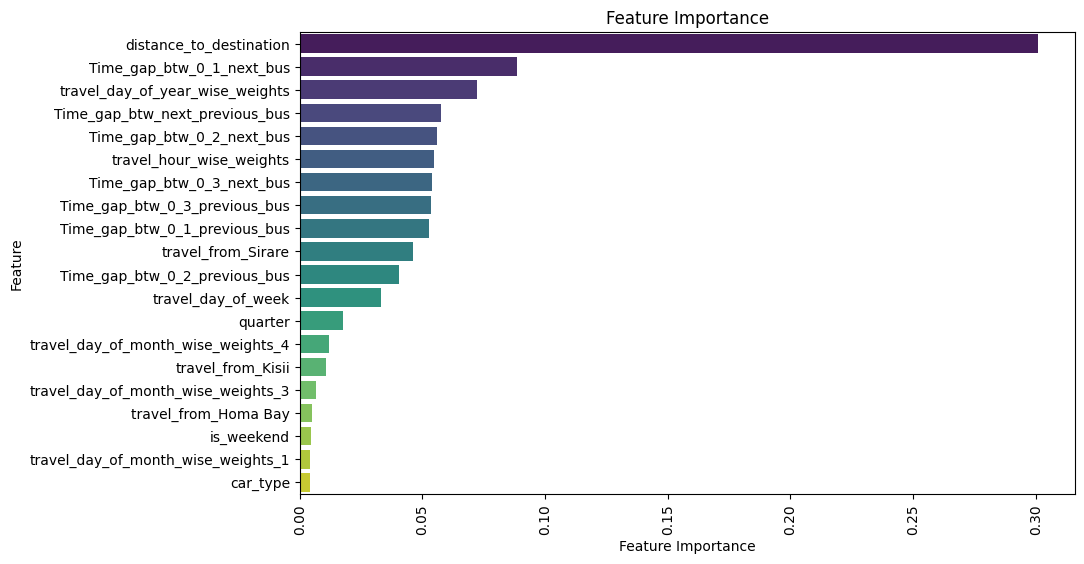

In [ ]:
#plotting the important fetures obtainind from the optimal RF model
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'viridis')
plt.xticks(rotation=90)
plt.title('Feature Importance')

## ****** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- In this project, we have used different regression models to predict transport demand from various places to nairobi.
- Using the data, we have created the target variable and several other features that contribute to our model performance.
- We have used regression models including:
  - Linear Models : Linear Regression, Lasso (L1), Ridge (L2)
  - Non Linear Models: Random Forest, XGBoost.

  We have also performed hyperparameter tuning to improve the performance of these models.
- Out of all these models, the hyperparameter tuned Random Forest gives the best result with an accuracy of around 95%.